In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [3]:
x_train = np.arange(-10,11)
y = sigmoid(x_train)
x_train,y

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([4.53978687e-05, 1.23394576e-04, 3.35350130e-04, 9.11051194e-04,
        2.47262316e-03, 6.69285092e-03, 1.79862100e-02, 4.74258732e-02,
        1.19202922e-01, 2.68941421e-01, 5.00000000e-01, 7.31058579e-01,
        8.80797078e-01, 9.52574127e-01, 9.82013790e-01, 9.93307149e-01,
        9.97527377e-01, 9.99088949e-01, 9.99664650e-01, 9.99876605e-01,
        9.99954602e-01]))

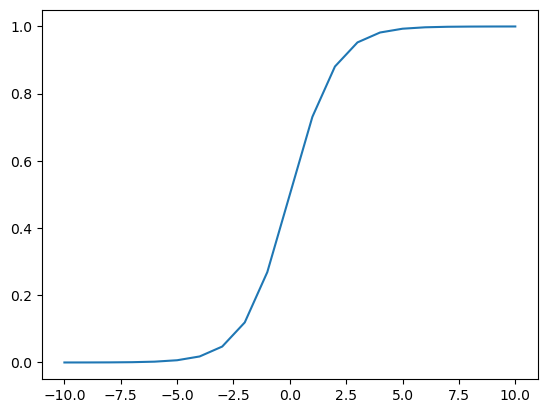

In [4]:
plt.plot(x_train,y)

In [5]:
def compute_cost_logistics(X,y,w,b):
    m,n = X.shape
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb = sigmoid(z_i)
        cost += -(y[i] * np.log(f_wb)) - ((1-y[i]) * np.log(1 - f_wb))
    cost /= m
    return cost
        

In [6]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])     

In [7]:
compute_cost_logistics(X_train, y_train, [1,1],-3)

0.36686678640551745

In [8]:
def compute_gradient(X,y,w,b):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        loss_i = f_wb_i -y[i]
        dj_db += loss_i
        for j in range(n):
            dj_dw[j] += loss_i * X[i,j]
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m     
    return dj_db, dj_dw

In [9]:
def gradient_descent(X,y,w_init,b_init,alpha,iterators,cost_function,compute_gradient):
    w = w_init
    b = b_init
    j_history = []
    iteration_records = []
    for i in range(iterators+1):
        dj_db,dj_dw = compute_gradient(X,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i % (iterators // 10) == 0:
            cost = cost_function(X, y, w,b)
            j_history.append(cost)
            iteration_records.append(i)
            print(f"Iteration {i}: Cost={cost:.4f}, w={np.round(w,4)}, b={b:.4f}")
    return w,b,j_history,iteration_records
        
        

In [10]:
def feature_scale(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_scaled = (X - mu) / sigma
    return X_scaled,mu,sigma

In [11]:
X = np.array([
    [1.2, 35],
    [2.5, 42],
    [0.9, 29],
    [3.1, 50],
    [2.8, 47],
    [1.0, 31],
    [4.2, 60],
    [3.7, 55],
    [1.1, 34],
    [2.2, 40],
    [5.0, 62],
    [0.8, 27],
    [3.4, 52],
    [2.0, 39],
    [4.5, 58],
    [1.5, 33],
    [2.7, 44],
    [3.9, 57],
    [1.3, 30],
    [4.8, 61]
])

y = np.array([
    0, 1, 0, 1, 1,
    0, 1, 1, 0, 0,
    1, 0, 1, 0, 1,
    0, 1, 1, 0, 1
])

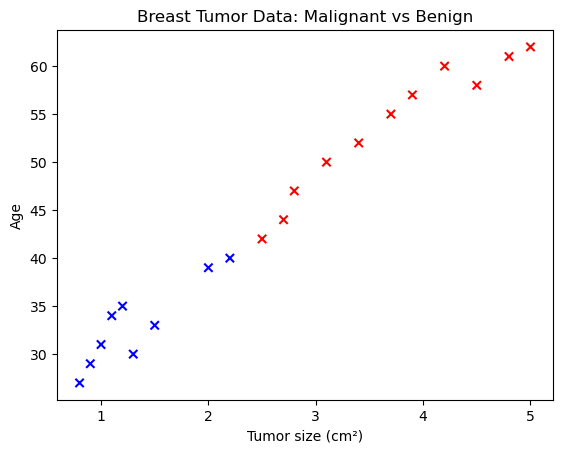

In [12]:
plt.scatter(X[:,0:1],X[:,1:], c=y, cmap='bwr', marker='x')
plt.xlabel('Tumor size (cm²)')
plt.ylabel('Age')
plt.title('Breast Tumor Data: Malignant vs Benign')
plt.show()

In [13]:
alpha = 0.001
iterations = 10000
X_scaled,mu,sigma = feature_scale(X)
w_initial = np.zeros(X_scaled.shape[1])
b_initial = 0.
w,b,j_history,iterations_record = gradient_descent(X_scaled,y,w_initial,b_initial,alpha,iterations,compute_cost_logistics,compute_gradient)


Iteration 0: Cost=0.6928, w=[0.0004 0.0004], b=0.0001
Iteration 1000: Cost=0.4513, w=[0.341  0.3457], b=0.0449
Iteration 2000: Cost=0.3464, w=[0.565 0.574], b=0.0837
Iteration 3000: Cost=0.2903, w=[0.7283 0.7407], b=0.1200
Iteration 4000: Cost=0.2554, w=[0.8565 0.8716], b=0.1549
Iteration 5000: Cost=0.2314, w=[0.9621 0.9795], b=0.1886
Iteration 6000: Cost=0.2138, w=[1.0523 1.0714], b=0.2212
Iteration 7000: Cost=0.2001, w=[1.1312 1.1516], b=0.2528
Iteration 8000: Cost=0.1891, w=[1.2015 1.223 ], b=0.2833
Iteration 9000: Cost=0.1800, w=[1.2652 1.2873], b=0.3128
Iteration 10000: Cost=0.1724, w=[1.3234 1.3461], b=0.3413


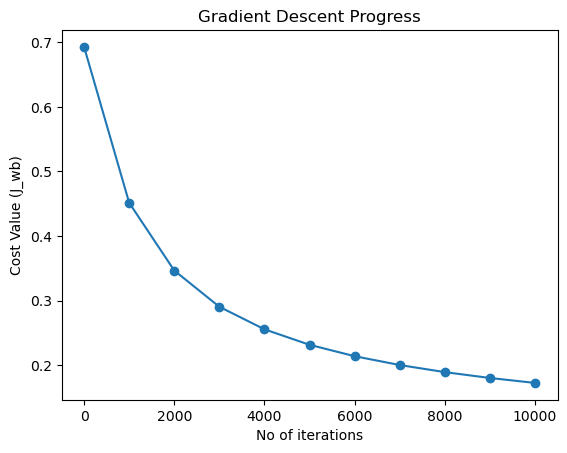

In [14]:
plt.plot(iterations_record,j_history, marker="o")
plt.title('Gradient Descent Progress')
plt.xlabel('No of iterations')
plt.ylabel('Cost Value (J_wb)')
plt.show()

In [15]:
def predict(X_new, mu, sigma, w,b):
    X_new_scaled = (X_new - mu)/sigma
    preds = sigmoid(np.dot(X_new_scaled,w) + b)
    return (preds >= 0.5).astype(int)

In [16]:
prediction = predict([4.8,61],mu,sigma,w,b)
if prediction == 1:
    result = 'Malignant'
else:
    result = 'Benign'
print(f'Patient having age 61 and tumor size 4.8cm² appears to be {result}')

Patient having age 61 and tumor size 4.8cm² appears to be Malignant


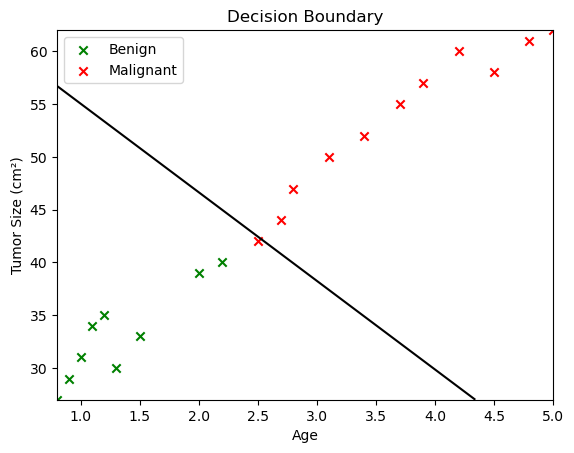

In [38]:
import numpy as np
import matplotlib.pyplot as plt

x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx, yy = np.meshgrid(x_values, y_values)

grid = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = (grid - mu) / sigma

probs = sigmoid(np.dot(grid_scaled, w) + b).reshape(xx.shape)

plt.contour(xx, yy, probs, levels=[0.5], colors='black')

plt.scatter(X[y==0, 0], X[y==0, 1], color='green', label='Benign', marker='x')
plt.scatter(X[y==1, 0], X[y==1, 1], color='red', label='Malignant', marker='x')

plt.xlabel("Age")
plt.ylabel("Tumor Size (cm²)")
plt.title("Decision Boundary")
plt.legend()
plt.show()
